In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Size of:")
print("Training Dataset:",train_num)
print("Testing Dataset:",test_num)
print("Validation Dataset:",valid_num)

Size of:
Training Dataset: 55000
Testing Dataset: 10000
Validation Dataset: 5000


In [4]:
data.test.cls = np.argmax(data.test.labels, axis=1)
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [5]:
#Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

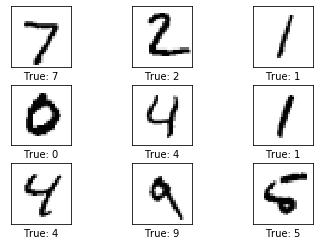

In [6]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

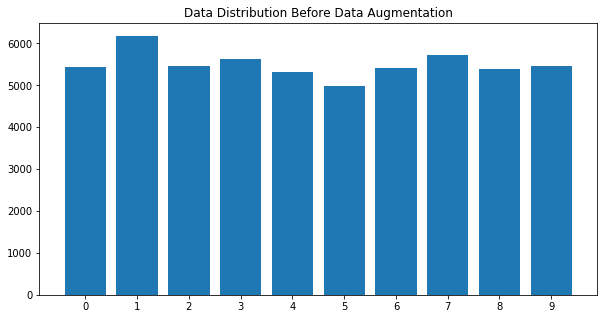

In [7]:
bar_fig = plt.figure(figsize=[10,5])
unique, counts = np.unique(np.argmax(data.train.labels,1), return_counts=True)
plt.bar(unique,counts)
plt.title("Data Distribution Before Data Augmentation")
plt.xticks(unique,np.arange(10));

In [16]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=36, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
print(net)

net = tf.layers.flatten(net)
print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate=0.001)
optimizer = opt.minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

trainable_var_list = tf.trainable_variables()

Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 36), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 1764), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)


In [17]:
x_train = data.train.images
y_train = data.train.labels
np.random.shuffle(y_train)
y_train.shape

init = tf.global_variables_initializer()

In [18]:
train_batch_size = 128
n_batch = data.train.num_examples // train_batch_size

loss_list_train = []
loss_list_test = []
sess = tf.Session()
sess.run(init)
for epoch in range(10):
    for batch in range(n_batch):
        batch_xs, batch_ys = data.train.next_batch(train_batch_size)
        _, l1 = sess.run([optimizer, loss], feed_dict={x:x_train, y_true:y_train})
        loss_list_train.append(l1)
        l2 = sess.run(loss, feed_dict={x:data.test.images,y_true:data.test.labels})
        loss_list_test.append(l2)
        print(l2)
        print(l1)
    #print("Epoch " + str(epoch) + " Testing Accuracy: " + str(acc))

2.3152966
2.309644
2.3106978
2.3112803
2.3077607
2.3034577
2.3072398
2.301375
2.3075578
2.3014622
2.3080544
2.3015947
2.30836
2.3014653
2.3087397
2.3011856
2.3090594
2.3008833
2.3092592
2.300616
2.3092687
2.3004003
2.3092532
2.3002608
2.3092575
2.3001788
2.309128
2.3001037
2.308862
2.299997
2.3085425
2.2998512
2.3082104
2.2996714
2.3078704
2.2994778
2.307599
2.2992814
2.3073337
2.2990823
2.3070948
2.2988732
2.3068492
2.2986548
2.3065503
2.2984147
2.3062282
2.2981603
2.3063636
2.297903
2.3068628
2.2976146
2.3075051
2.2972982
2.3083544
2.2969692
2.309197
2.29662
2.3100176
2.2962503
2.3109446
2.2958553
2.3120792
2.2954478
2.3132372
2.2949953
2.314395
2.2945323
2.315322
2.294033
2.3157783
2.2935238
2.3161159
2.2929811
2.3166068
2.2924051
2.3171663
2.291804
2.3171422
2.2911758
2.316775
2.290514
2.3156583
2.2898223
2.3153613
2.2891247
2.3153389
2.2885911
2.3137445
2.2884383
2.3139079
2.2873025
2.3149726
2.2864254
2.3148868
2.2862096
2.3152719
2.2849631
2.315418
2.2845743
2.3156307
2.2838023


2.5184124
2.030553
2.5455554
2.0287538
2.5474017
2.032212
2.5289702
2.0243409
2.5478356
2.0308175
2.5561953
2.0274758
2.5381618
2.0270445
2.5502148
2.035609
2.5465276
2.025537
2.5260804
2.029163
2.567298
2.0355568
2.5447855
2.0307755
2.517146
2.024
2.5670733
2.0317783
2.5584204
2.0342793
2.5195801
2.0257459
2.554149
2.0332627
2.5816872
2.0278778
2.5273464
2.0372374
2.538985
2.0278604
2.5759914
2.0221148
2.5311673
2.0328698
2.535429
2.017958
2.5561848
2.026411
2.5522747
2.014658
2.5374055
2.020027
2.5476758
2.0224295
2.5571308
2.016211
2.5481124
2.0153606
2.5455008
2.0206923
2.5431068
2.0219762
2.5620615
2.006636
2.5467427
2.0206196
2.5476716
2.0198007
2.5543768
2.0144598
2.5476694
2.0144553
2.5599892
2.0171375
2.5456095
2.0230732
2.556639
2.0072978
2.5647984
2.015354
2.5555506
2.0149868
2.5499349
2.0130525
2.5701077
2.011145
2.5651407
2.0105772
2.5443575
2.0177784
2.5759761
2.009729
2.557327
2.0119126
2.546568
2.012059
2.5722346
2.0192142
2.561068
2.0102434
2.5546544
2.0088596
2.560993

2.7396796
1.8595861
2.7426622
1.8598034
2.7566986
1.8631212
2.7462597
1.8723772
2.7493863
1.8711239
2.7528858
1.8630401
2.7441463
1.8550823
2.7560024
1.8518567
2.7296515
1.8530452
2.763115
1.8580186
2.7351735
1.8630904
2.7630026
1.8597949
2.7403612
1.8550727
2.74312
1.8485165
2.7546632
1.8479512
2.744718
1.8520246
2.7655075
1.8581703
2.7489789
1.8611176
2.745433
1.8566506
2.7513556
1.8509787
2.7319117
1.8469361
2.7671583
1.8467919
2.7318623
1.8491814
2.7800682
1.8538377
2.737766
1.8560619
2.7740386
1.8593061
2.7392583
1.854973
2.759275
1.8530015
2.7471194
1.8497771
2.7608306
1.8489664
2.754792
1.8487592
2.7596471
1.8482656
2.7550077
1.8448043
2.766308
1.842683
2.7461796
1.840823
2.7757115
1.842021
2.7503126
1.8478136
2.8007908
1.856781
2.7754757
1.8712871
2.8147602
1.8863938
2.7666194
1.8830048
2.7613778
1.8681409
2.7660341
1.8500069
2.760591
1.8484846
2.78571
1.8631299
2.7669327
1.8760514
2.7638624
1.8661747
2.755187
1.8449678
2.7711685
1.839844
2.784557
1.8533105
2.769129
1.8666513
2

2.9136202
1.736896
2.9349165
1.739199
2.9074676
1.7398629
2.9278052
1.7371705
2.923648
1.7352389
2.9179115
1.7338907
2.9418736
1.735971
2.9158428
1.7336972
2.9449923
1.7344457
2.9129233
1.7342154
2.9462972
1.7350547
2.9080274
1.7345405
2.9460871
1.7335031
2.9032757
1.7313827
2.9502292
1.7309182
2.9187462
1.7310506
2.9548042
1.7340268
2.9169917
1.7386181
2.9584124
1.740441
2.9173648
1.7421542
2.9473288
1.7430613
2.9270375
1.7384264
2.9390898
1.7387726
2.934887
1.7333997
2.9349694
1.732067
2.9274263
1.7274173
2.9313176
1.7243651
2.9491367
1.7238003
2.933086
1.7259884
2.9739585
1.7348975
2.9583976
1.7519699
2.9631531
1.7621545
2.945397
1.7634614
2.9406857
1.7441227
2.9337244
1.7339059
2.9281054
1.724777
2.9472003
1.7255182
2.9368138
1.7305928
2.9539363
1.7376634
2.943677
1.7407221
2.9267101
1.7388443
2.9434223
1.7379076
2.927533
1.7283072
2.9465308
1.7250648
2.9461884
1.7260021
2.9616947
1.7277737
2.9418194
1.7307522
2.9553192
1.7323475
2.9458866
1.730173
2.9343727
1.7261679
2.937875
1.72

3.0732
1.6340588
3.1009572
1.6356932
3.0977504
1.6393906
3.122426
1.6450481
3.0764966
1.6468233
3.1141238
1.6504253
3.079976
1.638935
3.0891511
1.6347617
3.086022
1.631847
3.0843074
1.6337352
3.1066833
1.6371864
3.0778177
1.6412753
3.1261673
1.6454351
3.0921023
1.6494186
3.1450794
1.656517
3.0974383
1.656393
3.1207898
1.660771
3.101262
1.6501987
3.092349
1.6380366
3.0941727
1.6291556
3.0804918
1.6259269
3.1150832
1.6312994
3.0984638
1.6382539
3.135143
1.653751
3.1214774
1.6576105
3.1335273
1.6601716
3.086285
1.6519878
3.085397
1.6404908
3.1146817
1.6321138
3.102583
1.6318907
3.1100981
1.6364903
3.113956
1.6400461
3.1236656
1.6414839
3.1181293
1.6432923
3.0901933
1.6345091
3.1177
1.6355929
3.0843134
1.6329912
3.1454546
1.6319941
3.0913923
1.6353264
3.1441565
1.6353809
3.0913875
1.6361729
3.1218414
1.6418148
3.095167
1.6370369
3.1420426
1.6370547
3.08784
1.635892
3.1129923
1.6341162
3.1104963
1.6323099
3.137062
1.6335295
3.1204045
1.6365184
3.13266
1.645625
3.1231186
1.648742
3.1293185
1

3.2449684
1.569156
3.256948
1.5571247
3.2488446
1.5565028
3.2595057
1.5639569
3.2897687
1.5787102
3.2536016
1.5827329
3.2617023
1.5834329
3.2421358
1.5628257
3.2689602
1.5533653
3.2368057
1.5491447
3.270267
1.552088
3.2565007
1.5580435
3.2610009
1.564295
3.261755
1.5653472
3.2482922
1.5555042
3.2898922
1.5510517
3.225178
1.5543406
3.2958097
1.5559899
3.2526858
1.5662022
3.310039
1.565537
3.24353
1.5722239
3.284272
1.575188
3.292912
1.5732415
3.2608228
1.57585
3.2818048
1.5628225
3.2356865
1.5562598
3.297425
1.5535144
3.2453272
1.5572124
3.2892735
1.562806
3.2601366
1.5645894
3.28046
1.5715929
3.251415
1.5657392
3.2688816
1.564729
3.2852376
1.5524691
3.2484117
1.5477827
3.2555034
1.5456785
3.2802687
1.5504534
3.3054523
1.5601108
3.272347
1.5668932
3.263684
1.5666924
3.2691278
1.5614324
3.272966
1.5520498
3.2548068
1.5454122
3.2738783
1.552328
3.3001566
1.5628048
3.2867796
1.5736713
3.270463
1.5789965
3.2946086
1.5679277
3.2655122
1.5586804
3.2579005
1.5506951
3.2571738
1.549271
3.288377

3.3970845
1.5181231
3.4375176
1.515533
3.4189074
1.5238614
3.4204063
1.5029446
3.4213355
1.5009247
3.4194868
1.4994103
3.4394438
1.5006667
3.3787098
1.5021659
3.4180648
1.4957635
3.3998098
1.4922165
3.4262047
1.4829614
3.3873758
1.4841394
3.4204004
1.4913452
3.452909
1.4989032
3.4232047
1.5095105
3.428799
1.5055918
3.4077
1.5089369
3.4444566
1.4969997
3.3855495
1.4897034
3.4167492
1.4934117
3.4227645
1.5006934
3.4502578
1.4958711
3.3998766
1.4965736
3.4054813
1.4893906
3.4260426
1.4829011
3.3990066
1.4872795
3.4054363
1.4864758
3.3982973
1.4871571
3.4398437
1.4864215
3.419206
1.485287
3.4350016
1.4839801
3.4402976
1.4934694
3.4517703
1.4988198
3.4022624
1.506319
3.4401548
1.5102423
3.4130516
1.5014793
3.4508238
1.4906704
3.3765712
1.4839709
3.4463005
1.4876148
3.4158375
1.489004
3.4763672
1.494551
3.3841593
1.4964875
3.4421937
1.4907846
3.4071856
1.485904
3.44161
1.4860389
3.4203017
1.4852625
3.433709
1.495329
3.4238398
1.4950882
3.4452624
1.4981062
3.4296935
1.4919515
3.438419
1.49164

3.5742486
1.4536124
3.567464
1.4681443
3.540553
1.4566017
3.5326445
1.4311837
3.5772696
1.4212704
3.5384078
1.4223859
3.5799642
1.4375799
3.5441546
1.4366437
3.5759902
1.4470897
3.5266626
1.4379545
3.5822887
1.4362826
3.5701578
1.436719
3.5646563
1.4332912
3.5769258
1.4266142
3.54539
1.4225165
3.575773
1.4251298
3.5220993
1.4252568
3.593266
1.4286385
3.576162
1.4368955
3.5731196
1.4315983
3.5381575
1.4295698
3.5606031
1.4203099
3.5769405
1.416317
3.5503078
1.4143395
3.5798652
1.416115
3.5514524
1.4196013
3.600375
1.4261886
3.529229
1.4287555
3.6130078
1.4325607
3.5510383
1.4368778
3.6288195
1.4461064
3.5440953
1.4549681
3.628789
1.4546734
3.542904
1.4492514
3.5636253
1.430676
3.5712461
1.4169469
3.5697944
1.4165084
3.6103196
1.4253656
3.5463343
1.4448167
3.6166625
1.450156
3.5651634
1.4544796
3.5906415
1.4394128
3.5602367
1.4271358
3.570189
1.4222037
3.5970712
1.4235426
3.5743563
1.4331532
3.59276
1.445448
3.5718734
1.4410071
3.5686426
1.4313364
3.557589
1.4190931
3.5495048
1.4078138
3

3.6912742
1.3914127
3.7545524
1.397446
3.6571116
1.3918502
3.725876
1.3878227
3.6891317
1.3785793
3.7298324
1.3741096
3.6628456
1.3717841
3.7206578
1.3776685
3.718017
1.3832321
3.7144015
1.3875908
3.699272
1.3829974
3.7014828
1.3750324
3.7113187
1.3689398
3.6867094
1.3628376
3.7240849
1.3653597
3.740282
1.3740413
3.721099
1.3833005
3.7003047
1.3881199
3.7362325
1.3839583
3.7138054
1.3778948
3.6931493
1.374575
3.712538
1.3749509
3.717454
1.3769789
3.7507317
1.3856145
3.6665108
1.3874549
3.7568915
1.3876824
3.7060337
1.3783338
3.7510996
1.3814245
3.684832
1.372573
3.763842
1.3755893
3.6994255
1.3817707
3.726414
1.3855175
3.6908796
1.3699398
3.7123551
1.3611518
3.7053907
1.3593129
3.7187476
1.3672336
3.7555435
1.3779213
3.7370481
1.3978174
3.757446
1.4093418
3.7214048
1.4191866
3.7633567
1.4027804
3.6997457
1.397239
3.7403288
1.3829409
3.7101367
1.3724297
3.7041407
1.3664467
3.7281456
1.3686514
3.740301
1.3739597
3.773584
1.3872947
3.7032382
1.4059645
3.7412179
1.4013358
3.734275
1.400900

KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

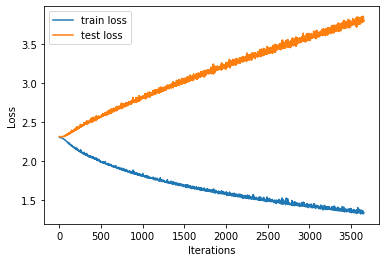

In [19]:
plt.plot(loss_list_train)
plt.plot(loss_list_test)
plt.legend(('train loss','test loss'))
plt.xlabel('Iterations')
plt.ylabel('Loss')